# Data preprocessing on Tibia data

In [1]:
# import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# load test data
train_data = pd.read_csv('../data_file/train_set.csv')

In [75]:
# load test set and blinded test set
test_data = pd.read_csv('../data_file/test_set.csv')
blinded_data = pd.read_csv('../data_file/blinded_test_set.csv')

In [5]:
# print test data
train_data

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_3230,Feature_3231,Feature_3232,Feature_3233,Feature_3234,Feature_3235,Feature_3236,Feature_3237,Feature_3238,CLASS
0,ID_1,18281.541667,18432.0,9409.650391,0.514708,0.011300,0.045369,2.803803,0.356658,1.803803,...,382.968383,2214.0,1.0,136.625113,0.061710,0.0,28.154838,4.174959,0.061710,0
1,ID_2,20010.083333,20100.0,8303.049072,0.417707,0.014959,0.080294,2.338398,0.429532,1.338398,...,452.986164,2548.5,1.0,232.564022,0.090548,0.0,27.934229,3.931950,0.090548,1
2,ID_3,27260.125000,27437.0,12189.649414,0.447160,0.011428,0.046402,2.782842,0.359345,1.782842,...,419.781765,3400.0,1.0,233.593529,0.068704,0.0,27.904807,4.085035,0.068704,1
3,ID_4,41938.125000,42138.0,17866.433594,0.426019,0.009908,0.034878,3.060655,0.326727,2.060655,...,439.023968,5424.0,1.0,427.429572,0.078803,0.0,27.870588,4.011726,0.078803,0
4,ID_5,41274.125000,41439.0,14315.041992,0.346828,0.013596,0.065680,2.478506,0.403469,1.478506,...,485.209184,5096.0,1.0,726.731554,0.142608,0.0,28.846909,3.571352,0.142608,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,ID_311,46787.916667,47002.0,18052.070312,0.385828,0.010883,0.042086,2.874885,0.347840,1.874885,...,466.276055,6064.0,1.0,585.547823,0.096561,0.0,28.787507,3.894684,0.096561,0
311,ID_312,8420.354167,8493.0,4292.039795,0.510004,0.016911,0.101797,2.145061,0.466555,1.145061,...,383.044821,987.0,1.0,69.155790,0.070369,0.0,29.625473,4.098452,0.070369,1
312,ID_313,37262.750000,37407.0,13950.793945,0.374390,0.012759,0.057837,2.585819,0.386725,1.585819,...,469.005263,4940.0,1.0,505.566802,0.102341,0.0,26.865256,3.815115,0.102341,0
313,ID_314,25081.833333,25251.0,11689.275391,0.466045,0.011197,0.044546,2.820962,0.354489,1.820962,...,403.597826,2944.0,1.0,215.172554,0.073089,0.0,29.180584,4.055504,0.073089,1


In [6]:
train_data= train_data.drop(columns=['ID'])  # 'ID' has no predictive value

In [7]:
# get test_data info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Columns: 3239 entries, Feature_1 to CLASS
dtypes: float64(3238), int64(1)
memory usage: 7.8 MB


In [9]:
# get statistic info of data
train_data.describe()

C:\Users\User\miniconda3\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\User\miniconda3\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_3230,Feature_3231,Feature_3232,Feature_3233,Feature_3234,Feature_3235,Feature_3236,Feature_3237,Feature_3238,CLASS
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,...,315.000000,315.000000,315.0,315.000000,315.000000,315.0,315.000000,315.000000,315.000000,315.000000
mean,36401.611839,36558.978836,13421.797935,0.399783,0.013326,0.066770,2.572654,0.395949,1.572654,355.140036,...,458.273347,4580.805291,1.0,620.374167,0.112015,0.0,28.510670,3.792381,0.112015,0.393651
std,23979.228698,24006.711019,5229.346354,0.064272,0.002885,0.034442,0.305500,0.054492,0.305500,5460.014132,...,39.628050,2980.121623,0.0,1254.417871,0.043563,0.0,1.711272,0.257607,0.043563,0.489336
min,4601.166667,4646.000000,2420.351481,0.137726,0.008904,0.028169,1.684709,0.304269,0.684709,1.262551,...,309.374029,591.333333,1.0,45.791124,0.058477,0.0,16.430985,1.995746,0.058477,0.000000
25%,23287.562500,23443.500000,10245.704590,0.357646,0.011459,0.046652,2.403035,0.359990,1.403035,14.214779,...,432.298489,2881.000000,1.0,245.299821,0.083622,0.0,27.691774,3.655440,0.083622,0.000000
50%,34818.166667,35028.000000,13894.792969,0.394076,0.012477,0.055314,2.624547,0.381018,1.624547,24.110200,...,460.598280,4377.000000,1.0,424.561776,0.103960,0.0,28.424340,3.815115,0.103960,0.000000
75%,45575.708333,45750.000000,16633.839844,0.434799,0.014242,0.072065,2.777867,0.416141,1.777867,43.724701,...,484.566083,5769.000000,1.0,702.791528,0.131579,0.0,29.450389,3.963320,0.131579,1.000000
max,332120.750000,332379.000000,45741.601562,0.643473,0.025418,0.266032,3.286567,0.603905,2.286567,96940.788837,...,636.069588,40797.000000,1.0,20921.640194,0.512823,0.0,35.149153,4.271132,0.512823,1.000000


## Handling Missing values

In [10]:
# checking duplicates in test data
train_data.duplicated().sum()

0

In [11]:
# test for column if all value is null in columns
train_data.isnull().all().sum()

0

In [12]:
# extract columns with null value
null_columns = train_data.columns[train_data.isnull().any()]
print(null_columns)

Index(['Feature_1712', 'Feature_1713', 'Feature_1714', 'Feature_1715',
       'Feature_1716', 'Feature_1717', 'Feature_1718', 'Feature_1719',
       'Feature_1720', 'Feature_1721', 'Feature_1722', 'Feature_1723',
       'Feature_1724', 'Feature_1725', 'Feature_1726', 'Feature_1727',
       'Feature_1728', 'Feature_1729', 'Feature_1730', 'Feature_1731',
       'Feature_1732', 'Feature_1733', 'Feature_1734'],
      dtype='object')


In [13]:
# check how many nulls are in columns
null_counts = train_data.isnull().sum()
print(null_counts[null_counts > 0])

Feature_1712    116
Feature_1713    116
Feature_1714    116
Feature_1715    116
Feature_1716    116
Feature_1717    116
Feature_1718    116
Feature_1719    116
Feature_1720    116
Feature_1721    116
Feature_1722    116
Feature_1723    116
Feature_1724    116
Feature_1725    116
Feature_1726    116
Feature_1727    116
Feature_1728    116
Feature_1729    116
Feature_1730    116
Feature_1731    116
Feature_1732    116
Feature_1733    116
Feature_1734    116
dtype: int64


#### Almost 50% of values are null

In [14]:
# checking unique values in features having null_values
print(train_data['Feature_1712'].unique())

[1.00444878 1.13807531 1.38900026 1.35167782 1.16489298 1.06116204
        nan 1.23450409 1.20563741 1.38668236 1.26231006 1.01047016
 1.20673596 1.3689382  1.3520516  1.04291614 1.07981179 1.16516517
 1.00033735 1.2284624  1.23796495 1.39468992 1.0474853  1.0755088
 1.08275598 1.0010039  1.19851468 1.16711083 1.08991947 1.36764557
 1.46123682 1.29343783 1.06901797 1.29584505 1.21051232 1.21352199
 1.32777268 1.04141309 1.00815512 1.25936013 1.10844483 1.24295284
 1.1521845  1.38567172 1.36713814 1.00026743 1.1965829  1.00059801
 1.00009721 1.30623709 1.32237112 1.08209652 1.23216062 1.02608766
 1.19296412 1.13533662 1.00099146 1.20051322 1.18606256 1.16035806
 1.14411429 1.27885214 1.02442799 1.16119034 1.22449635 1.57223793
 1.00203699 1.16833771 1.15545664 1.18285485 1.32880864 1.18482844
 1.48051015 1.2601488  1.24079308 1.04501217 1.00343506 1.06584738
 1.07147505 1.46136386 1.05039982 1.02730774 1.01466512 1.00049375
 1.00041339 1.13123374 1.02296848 1.11880414 1.17207191 1.09354

### After analyzing data, Among columns with null_values, some columns have less then 4 unique values and some have all unique values, the float numbers are, positive and negative

#### Lets seperate null_column which have less uniqe featrues and more unique features

In [15]:
low_unique_cols = [col for col in train_data.columns if train_data[col].nunique(dropna=True) < 4 and train_data[col].isnull().any()]
high_unique_cols = [col for col in train_data.columns if train_data[col].nunique(dropna=True) >= 4 and train_data[col].isnull().any()]

#### Handling columns with low unique values

In [16]:
low_unique_cols

['Feature_1717',
 'Feature_1718',
 'Feature_1720',
 'Feature_1723',
 'Feature_1732',
 'Feature_1734']

In [17]:
# function to count unique values of lower unique counts colums
def value_counts_low_uqd(low_unique_cols, data):
    counts_dict = {}
    for col in low_unique_cols:
        counts_dict[col] = data[col].value_counts()
    return counts_dict

In [18]:
counts = value_counts_low_uqd(low_unique_cols, train_data)
print(counts)

{'Feature_1717': Feature_1717
1.000000    198
1.333333      1
Name: count, dtype: int64, 'Feature_1718': Feature_1718
1.000000    198
1.333333      1
Name: count, dtype: int64, 'Feature_1720': Feature_1720
2.0    199
Name: count, dtype: int64, 'Feature_1723': Feature_1723
1.000000    198
0.666667      1
Name: count, dtype: int64, 'Feature_1732': Feature_1732
1.0    199
Name: count, dtype: int64, 'Feature_1734': Feature_1734
1.0    199
Name: count, dtype: int64}


#### lets check correlation of these columns with class 

In [19]:
# temporary fill data for correlation
temp_df = train_data[low_unique_cols + ['CLASS']].copy()

In [20]:
# fill NaNs temporarily in each low unique column with its mode
for col in low_unique_cols:
    mode_val = temp_df[col].mode()[0]
    temp_df[col].fillna(mode_val, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_4180\2372759103.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  temp_df[col].fillna(mode_val, inplace=True)


In [21]:
temp_df

,Feature_1717,Feature_1718,Feature_1720,Feature_1723,Feature_1732,Feature_1734,CLASS
0,1.0,1.0,2.0,1.0,1.0,1.0,0
1,1.0,1.0,2.0,1.0,1.0,1.0,1
2,1.0,1.0,2.0,1.0,1.0,1.0,1
3,1.0,1.0,2.0,1.0,1.0,1.0,0
4,1.0,1.0,2.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...
310,1.0,1.0,2.0,1.0,1.0,1.0,0
311,1.0,1.0,2.0,1.0,1.0,1.0,1
312,1.0,1.0,2.0,1.0,1.0,1.0,0
313,1.0,1.0,2.0,1.0,1.0,1.0,1


In [22]:
# calculate correlation matrix
corr_matrix = temp_df.corr()

# extract correlation of each low unique column with the target
corr_with_class = corr_matrix['CLASS'].sort_values(ascending=False)

print(corr_with_class)

CLASS           1.000000
Feature_1717    0.070039
Feature_1718    0.070039
Feature_1723   -0.070039
Feature_1720         NaN
Feature_1732         NaN
Feature_1734         NaN
Name: CLASS, dtype: float64


These columns has negligable or weak correlation with class so we can drop them

Strong Correlation: |r| > 0.7 indicates a strong linear relationship.

Moderate Correlation: 0.5 < |r| < 0.7 suggests a moderate relationship.

Weak Correlation: 0.3 < |r| < 0.5 implies a weak association.

Negligible Correlation: |r| < 0.3 suggests little or no linear correlation.

In [23]:
# Drop columns with low unique values
train_data.drop(low_unique_cols, axis = 1, inplace = True)

In [24]:
high_unique_cols

['Feature_1712',
 'Feature_1713',
 'Feature_1714',
 'Feature_1715',
 'Feature_1716',
 'Feature_1719',
 'Feature_1721',
 'Feature_1722',
 'Feature_1724',
 'Feature_1725',
 'Feature_1726',
 'Feature_1727',
 'Feature_1728',
 'Feature_1729',
 'Feature_1730',
 'Feature_1731',
 'Feature_1733']

In [25]:
counts = value_counts_low_uqd(high_unique_cols, train_data)
print(counts)

{'Feature_1712': Feature_1712
1.004449    1
1.012395    1
1.004467    1
1.000452    1
1.202078    1
           ..
1.328809    1
1.184828    1
1.480510    1
1.260149    1
1.270678    1
Name: count, Length: 199, dtype: int64, 'Feature_1713': Feature_1713
0.004429    1
0.012241    1
0.004447    1
0.000452    1
0.161243    1
           ..
0.187341    1
0.150667    1
0.249620    1
0.192471    1
0.197411    1
Name: count, Length: 199, dtype: int64, 'Feature_1714': Feature_1714
14.892446    1
8.814282     1
14.862129    1
47.015960    1
1.483856     1
            ..
0.978625     1
1.623933     1
0.078019     1
1.093424     1
1.032263     1
Name: count, Length: 199, dtype: int64, 'Feature_1715': Feature_1715
 219.784956     1
 75.691563      1
 218.882865     1
 2208.500452    1
 0.201829       1
               ..
 0.007062       1
 0.637158       1
-1.993913       1
-0.804423       1
-0.934433       1
Name: count, Length: 199, dtype: int64, 'Feature_1716': Feature_1716
1.000000    189
1.50000

In [26]:
def evaluete_range(high_unique_cols, data):
    range_ = {}
    for col in high_unique_cols:
        range_[col] = [data[col].min(), data[col].max()]
    return range_

In [27]:
ranges_ = evaluete_range(high_unique_cols, train_data)
print(ranges_)

{'Feature_1712': [1.0000972100709633, 1.5722379305277738], 'Feature_1713': [9.720062116545512e-05, 0.2496201457116177], 'Feature_1714': [-0.332717048265728, 101.41005915203642], 'Feature_1715': [-1.9939130828195089, 10282.000097219525], 'Feature_1716': [1.0, 2.0], 'Feature_1719': [1.0, 2.0], 'Feature_1721': [1.0, 2.0], 'Feature_1722': [0.0, 1.0], 'Feature_1724': [0.0001943467505043, 0.4992402791976928], 'Feature_1725': [0.0, 0.4992402791976928], 'Feature_1726': [9.721006790641697e-05, 0.4805101454257965], 'Feature_1727': [0.0098580801859498, 0.3535480201244354], 'Feature_1728': [0.0, 0.3333333333333333], 'Feature_1729': [0.001435905473513, 0.99890369448105], 'Feature_1730': [0.5007597085767643, 0.9998055987576692], 'Feature_1731': [-96655.0, 4485.0], 'Feature_1733': [-96655.0, 4485.0]}


In [28]:
# fill nan value of high unique cols with median value based on 'CLASS' feature
# choose median since some columns have outliers
for col in high_unique_cols:
    train_data[col] = train_data.groupby('CLASS')[col].transform(lambda x: x.fillna(x.median()))

In [29]:
# check if feature_1731 equals to feature_1733
train_data['Feature_1731'].equals(train_data['Feature_1733'])

True

In [30]:
# drop feature_1733 since it is dublicate of feature_1731
train_data.drop('Feature_1733', axis=1, inplace = True)

In [31]:
# checking null value
train_data.isnull().any().sum()

0

## identifying and handling Outliers

#### Handling outlier of feature_1714

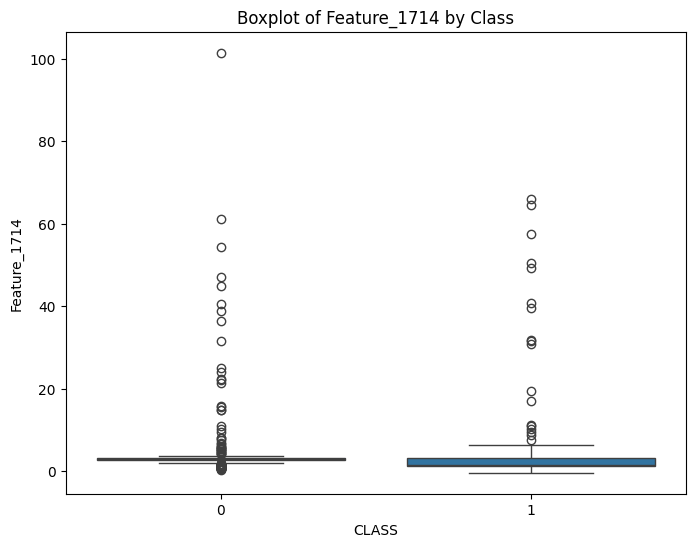

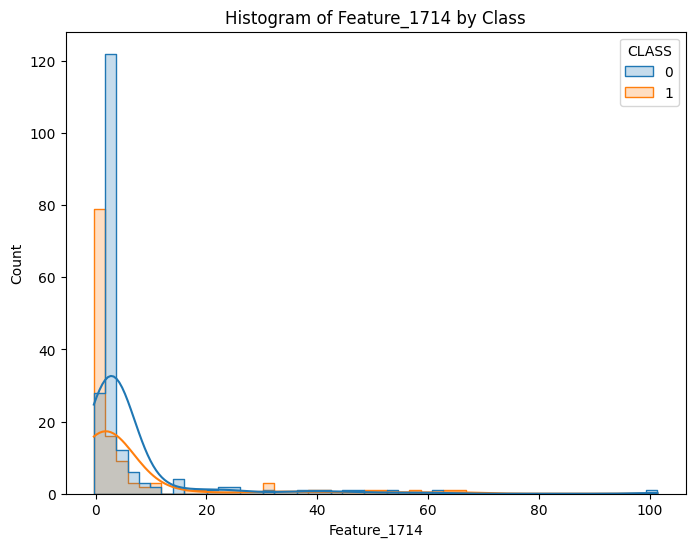

In [32]:
# The wide range of value can be seen on fearure 1714, lets visualize it 
plt.figure(figsize=(8, 6))
sns.boxplot(x='CLASS', y='Feature_1714', data=train_data)
plt.title('Boxplot of Feature_1714 by Class')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data=train_data, x='Feature_1714', hue='CLASS', bins=50, kde=True, element="step")
plt.title('Histogram of Feature_1714 by Class')
plt.show()

The column feature_1714 have outliers

In [33]:
# let's cap outlier for feature_1714

# loop over both classes
for cls in [0, 1]:
    # subset for the class
    class_data = train_data[train_data['CLASS'] == cls]

    # compute Q1, Q3, and IQR
    Q1 = class_data['Feature_1714'].quantile(0.25)
    Q3 = class_data['Feature_1714'].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR

    # mask for outliers in this class
    mask = (train_data['CLASS'] == cls) & (train_data['Feature_1714'] > upper_bound)

    # replace outliers with Q3 for this class
    train_data.loc[mask, 'Feature_1714'] = Q3

    print(f"Capped {mask.sum()} outliers in Class {cls} with Q3 = {Q3:.2f}")

Capped 40 outliers in Class 0 with Q3 = 3.24
Capped 18 outliers in Class 1 with Q3 = 3.33


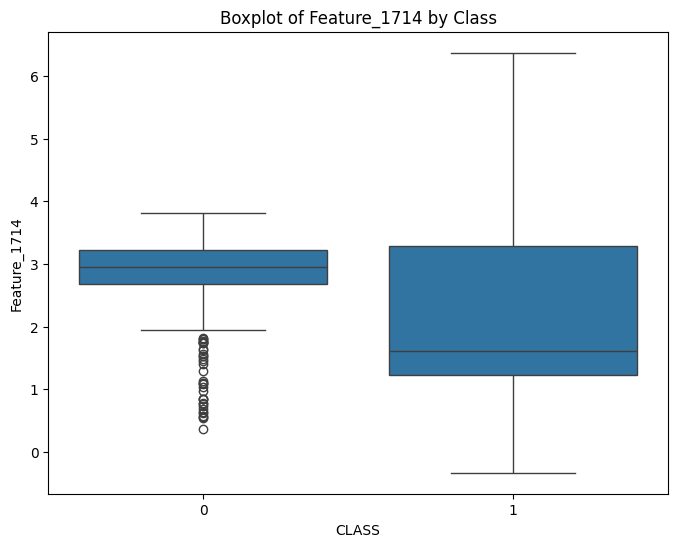

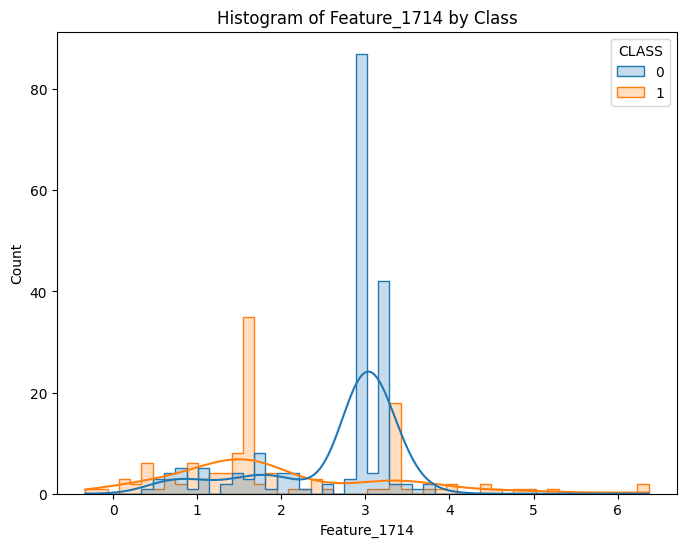

In [34]:
# Visualization after capping outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='CLASS', y='Feature_1714', data=train_data)
plt.title('Boxplot of Feature_1714 by Class')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data=train_data, x='Feature_1714', hue='CLASS', bins=50, kde=True, element="step")
plt.title('Histogram of Feature_1714 by Class')
plt.show()

In [35]:
# identify features with consistent values
constant_cols = train_data.loc[:, train_data.nunique() == 1]
constant_cols

,Feature_1910,Feature_1911,Feature_1912,Feature_1913,Feature_1914,Feature_1915,Feature_1916,Feature_1917,Feature_1918,Feature_1919,...,Feature_2981,Feature_2982,Feature_3097,Feature_3098,Feature_3104,Feature_3107,Feature_3225,Feature_3226,Feature_3232,Feature_3235
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
311,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
312,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
313,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0


#### These featurses with constant value add no value in ML model

In [36]:
# since these constant feature add no value to model lets drop them
train_data = train_data.loc[:, train_data.nunique() != 1]

# Feature Engineering

In [40]:
# seperate featurs and class
X = train_data.drop(columns=['CLASS'], errors='ignore')
y = train_data['CLASS']

In [ ]:
# # As features are huge, use mutal_info (MI) for feature selection: it measures dependency of featues on class
# # calculate mutual information between each feature and the class
# # 'discrete_features="auto"' means sklearn will automatically try to guess which features are discrete/categorical
# mi = mutual_info_classif(X, y, discrete_features='auto')

# # create pand series
# mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)

# print("Top 10 features by Mutual Information:")
# print(mi_series.head(10))
# print("Top 10 less dependent featurs by Mutual Information")
# print(mi_series.tail(10))

In [ ]:
# # drop features with MI = 0.01
# low_mi_features = mi_series[mi_series = 0.01].index
# #test_data = test_data.drop(columns=low_mi_features)

# print(f"Dropped {len(low_mi_features)} features with MI = 0.0")

#### Standradrize featurest with standardScalwr

In [38]:
scaler = StandardScaler()

In [43]:
print(np.isinf(X).any().sum())  # Total number of columns with inf values

2


In [44]:
# check columns which have infinete value
large_columns = X.columns[X.max() > 1e10]
print("Columns with large values:\n", large_columns)

Columns with large values:
 Index(['Feature_72', 'Feature_90', 'Feature_827', 'Feature_843', 'Feature_853',
       'Feature_859', 'Feature_866', 'Feature_869', 'Feature_875',
       'Feature_882', 'Feature_885', 'Feature_891', 'Feature_898',
       'Feature_971', 'Feature_987', 'Feature_1003', 'Feature_1019',
       'Feature_2398', 'Feature_2414', 'Feature_2430', 'Feature_2446',
       'Feature_2472', 'Feature_2477', 'Feature_2478', 'Feature_2488',
       'Feature_2493', 'Feature_2494', 'Feature_2501', 'Feature_2504',
       'Feature_2509', 'Feature_2510', 'Feature_2517', 'Feature_2574'],
      dtype='object')


In [47]:
# view large values
print(X[large_columns].describe())

       Feature_72  Feature_90   Feature_827   Feature_843   Feature_853  \
count  315.000000  315.000000  3.150000e+02  3.150000e+02  3.150000e+02   
mean     0.771761    0.771761  3.824776e+08  1.372714e+11  7.969859e+07   
std      4.911687    4.911687  1.295575e+09  5.271794e+11  2.626808e+08   
min    -59.000000  -59.000000  9.893812e+03  3.418935e+05  1.203143e+03   
25%      0.598649    0.598649  6.120714e+05  6.112737e+07  1.118369e+05   
50%      0.891892    0.891892  1.340550e+07  4.492736e+08  8.401063e+05   
75%      0.966384    0.966384  1.621021e+08  1.053799e+11  7.028331e+07   
max     24.853333   24.853333  9.349100e+09  4.290401e+12  2.206999e+09   

        Feature_859   Feature_866   Feature_869   Feature_875   Feature_882  \
count  3.150000e+02  3.150000e+02  3.150000e+02  3.150000e+02  3.150000e+02   
mean   8.295904e+10  2.310171e+07  1.245232e+08  3.321335e+10  2.540653e+07   
std    2.696072e+11  4.384118e+07  2.925079e+08  7.624835e+10  4.798992e+07   
min    1

In [46]:
# cap to the 99th percentile
for col in large_columns:
    cap_value = X[col].quantile(0.99)
    X[col] = X[col].clip(upper=cap_value)

In [48]:
# apply standardscaler on X data
X_scaled = scaler.fit_transform(X)

In [49]:
# apply principle component analysis on saled features
pca = PCA(n_components=0.98) 
X_pca = pca.fit_transform(X_scaled)

In [50]:
X_pca.shape

(315, 91)

In [51]:
# # save X_pca and class
# processed_df = pd.DataFrame(X_pca)
# processed_df['CLASS'] = y.values  # Add target column

# # save to CSV
# processed_df.to_csv("tibia_processed_data.csv", index=False)

# Now applying same preprocess steps on test set and blinded test set

In [76]:
test_data= test_data.drop(columns=['ID'])  # 'ID' has no predictive value

In [77]:
blinded_data = blinded_data.drop(columns = ['ID'])  # drop 'ID' column

In [78]:
# get test_data info
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 3239 entries, Feature_1 to CLASS
dtypes: float64(3238), int64(1)
memory usage: 2.5 MB


In [79]:
# get blinded_data info
blinded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Columns: 3238 entries, Feature_1 to Feature_3238
dtypes: float64(3238)
memory usage: 910.8 KB


## Handling Missing values

#### Lets delete all columns that are not in train_data

In [80]:
# keep only columns in test_data that are present in train_data
test_data = test_data[train_data.columns.intersection(test_data.columns)]

# keep only columns in blinded_data that are present in train_data
blinded_data = blinded_data[train_data.columns.intersection(blinded_data.columns)]

In [81]:
# test for column if all value is null in columns
test_data.isnull().all().sum()
blinded_data.isnull().all().sum()

0

In [82]:
# test if any value is null in column
test_data.isnull().any().sum()

16

In [83]:
# test if any value is null in column
blinded_data.isnull().any().sum()

16

In [88]:
# get columns with null value
null_columns = test_data.columns[test_data.isnull().any()]

In [89]:
# filling missing values with median , group by class, apply on both data since all null features are same
for col in null_columns:
    test_data[col] = test_data[col].fillna(test_data[col].median())
    blinded_data[col] = blinded_data[col].fillna(train_data[col].median())

# Feature Engineering

In [90]:
# seperate featurs and class
X_test = test_data.drop(columns=['CLASS'], errors='ignore')
y_test = test_data['CLASS']

In [91]:
X_blinded = blinded_data

#### Standradrize featurest with standardScaler

In [92]:
X_test_scaled = scaler.transform(X_test)
X_blinded_scaled = scaler.transform(X_blinded)

In [93]:
# apply principle component analysis on saled features

# For test data:
X_test_pca = pca.transform(X_test_scaled)

# For blinded data:
X_blinded_pca = pca.transform(X_blinded_scaled)


#### Save preprocessed features and class

In [94]:
# # save X_test_pca and class
# processed_test = pd.DataFrame(X_test_pca)
# processed_test['CLASS'] = y_test.values  # Add target column

# # save to CSV
# processed_test.to_csv("tibia_processed_test_data.csv", index=False)

# # save X_blinded data
# processed_blinded = pd.DataFrame(X_blinded_pca)
# processed_blinded.to_csv("processed_blinded.csv", index = False)